# Official Implementation

https://github.com/SwinTransformer/Swin-Transformer-Object-Detection

##Mount GDrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

##Installing Library (Run)

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Tue_Sep_15_19:10:02_PDT_2020
Cuda compilation tools, release 11.1, V11.1.74
Build cuda_11.1.TC455_06.29069683_0
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!pip list -v | grep [Tt]orch

torch                         1.9.1           /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages
torchaudio                    0.9.0a0+a85b239 /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages
torchvision                   0.2.2           /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages


In [ ]:
!pip list -v | grep [Pp]illow

Pillow                        8.3.1           /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages conda


In [ ]:
!pip list -v | grep [Mm]mcv

mmcv-full                     1.3.14          /home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages pip


In [ ]:
# pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.9.0/index.html

In [ ]:
!ls

anaconda3						      Music
cuda-repo-ubuntu2004-11-1-local_11.1.0-455.23.05-1_amd64.deb  Pictures
Desktop							      Public
Documents						      snap
Downloads						      Templates
GitHubDesktop-linux-2.9.3-linux3.deb			      Videos


In [ ]:
# # Install mmdetection
# !rm -rf mmdetection
# !git clone https://github.com/open-mmlab/mmdetection.git
# %cd mmdetection

# !pip install -e .

# # install Pillow 7.0.0 back in order to avoid bug in colab
# #!pip install Pillow==7.0.0
# #!pip install Pillow

Obtaining file:///home/ali/Desktop/mmdetection
  Running setup.py develop for mmdet


In [ ]:
# Check Pytorch installation
import torch, torchvision
print('Torch Version: ',torch.__version__)
print('Is Torch CUDA available? ', torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print('MMDetection Version: ', mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('CUDA Compiler Version: ', get_compiling_cuda_version())
print('GCC Version: ',get_compiler_version())

Torch Version:  1.9.1
Is Torch CUDA available?  True
MMDetection Version:  2.17.0
CUDA Compiler Version:  11.1
GCC Version:  GCC 9.3


##Optional Apex (run)

In [ ]:
# !pip install apex

In [ ]:
# git clone https://github.com/NVIDIA/apex
# cd apex
# pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

This is original paper implementation, experimental on windows. It is laying on MMDet tool, the issues are cuda version and pytorch,torchvision libraries dependencies. It is not recommended to use original code because it does not comply MMDet standarization proceduers.

##MMDetection GITHUB (run)

In [ ]:
# cd '/home/ali/Desktop/mmdetection/mmdetection'

In [ ]:
cd '/home/ali/Desktop/mmdetection'

/home/ali/Desktop/mmdetection


In [ ]:
!ls

CITATION.cff  docs_zh-CN       pycocoEvalDemo.ipynb  resources	  tools
configs       LICENSE	       pytest.ini	     results	  tutorial_exps
data	      MANIFEST.in      README.md	     setup.cfg	  tutorial_swin
demo	      mmdet	       README_zh-CN.md	     setup.py
docker	      mmdet.egg-info   requirements	     test_ali.py
docs	      model-index.yml  requirements.txt      tests


In [ ]:
#!mkdir checkpoints

##Prepare TBX11K Dataset (run)

In [ ]:
cd '/home/ali/Desktop/mmdetection'

/home/ali/Desktop/mmdetection


In [ ]:
# !unzip -q ../drive/MyDrive/TBX11K/TBX11K.zip -d data/
# !unzip -q /media/ali/NCAI-MIDL-TB/Datasets/TBX11K.zip -d data/


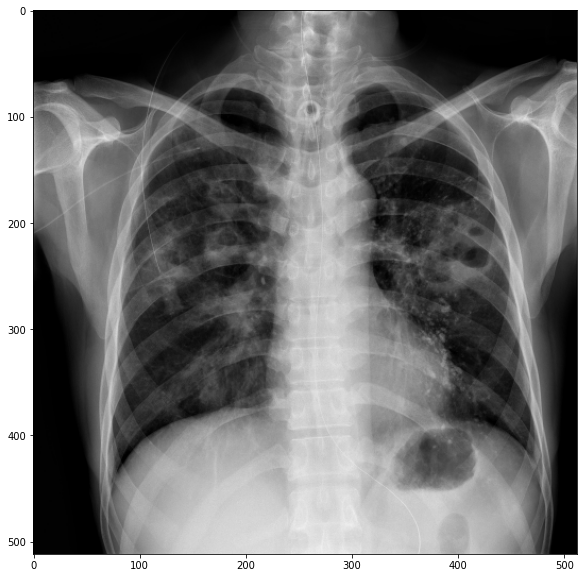

In [ ]:
# Let's take a look at the dataset image
%matplotlib inline
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('data/TBX11K/imgs/tb/tb0006.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:

# from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# # Choose to use a config and initialize the detector
# config = '/content/mmdetection/configs/swin/mask_rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco.py'
# # Setup a checkpoint file to load
# checkpoint = '/content/mmdetection/mask_rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco_20210906_131725-bacf6f7b.pth'
# # initialize the detector
# model = init_detector(config, checkpoint, device='cuda:0')


###ali modification
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
# config = 'configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k.py'
# config = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K.py'
config = 'configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_C1.py'

# Setup a checkpoint file to load
# checkpoint = '/content/mmdetection/mask_rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco_20210906_131725-bacf6f7b.pth'
# checkpoint = 'checkpoints/mask_rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco_20210906_131725-bacf6f7b.pth'
# initialize the detector
model = init_detector(config, device='cuda:0')


from mmdet.apis import set_random_seed


from mmcv import Config
cfg = Config.fromfile(config)
print(f'Config:\n{cfg.pretty_text}')

/home/ali/Desktop/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='SwinTransformer',
        embed_dims=96,
        depths=[2, 2, 6, 2],
        num_heads=[3, 6, 12, 24],
        window_size=7,
        mlp_ratio=4,
        qkv_bias=True,
        qk_scale=None,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.2,
        patch_norm=True,
        out_indices=(0, 1, 2, 3),
        with_cp=False,
        convert_weights=True,
        init_cfg=dict(
            type='Pretrained',
            checkpoint=
            'https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_tiny_patch4_window7_224.pth'
        )),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5

In [ ]:
model

FasterRCNN(
  (backbone): SwinTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (stages): ModuleList(
      (0): SwinBlockSequence(
        (blocks): ModuleList(
          (0): SwinBlock(
            (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (attn): ShiftWindowMSA(
              (w_msa): WindowMSA(
                (qkv): Linear(in_features=96, out_features=288, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=96, out_features=96, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop): DropPath()
            )
            (norm2): LayerNorm((96,), eps=1e-05, elementwise_a

### CFG CocoDataset format (run) How to use exisitng COCO format dataset

In [ ]:

cfg.dataset_type = 'TBX11K'
#cfg.dataset_type = 'CocoDataset'
cfg.classes = ('ActiveTuberculosis', 'ObsoletePulmonaryTuberculosis',)

#number of classes
cfg.model.roi_head.bbox_head.num_classes = 2 # For Swin Transformer

cfg.data.test.classes = cfg.classes
cfg.data.train.classes = cfg.classes
cfg.data.val.classes = cfg.classes
cfg.data.test.type = cfg.dataset_type
cfg.data.train.type = cfg.dataset_type
cfg.data.val.type = cfg.dataset_type

#for training
cfg.data.test.ann_file=cfg.data_root + 'annotations/json/TBX11K_val_only_tb.json'
#for testing
#ann_file='data/TBX11K/annotations/json/all_test.json',

cfg.data.samples_per_gpu = 48
cfg.data.workers_per_gpu = 1


# Set up working dir to save files and logs.
# cfg.work_dir = './tutorial_exps'
cfg.work_dir = './tutorial_swin_C1'


#cfg.optimizer.lr = 0.00005
# cfg.lr_config.step=[330, 420]#swin
cfg.lr_config = dict(
    policy='CosineAnnealing',
    warmup='linear',
    warmup_iters=85*1,
    warmup_ratio=0.001,
    min_lr=0)
cfg.log_config.interval = 17

# cfg.load_from = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_2x_coco/faster_rcnn_r50_fpn_2x_coco_bbox_mAP-0.384_20200504_210434-a5d8aa15.pth'
cfg.load_from = 'https://download.openmmlab.com/mmdetection/v2.0/swin/mask_rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco/mask_rcnn_swin-t-p4-w7_fpn_ms-crop-3x_coco_20210906_131725-bacf6f7b.pth'
cfg.resume_from = 'tutorial_swin_C1/epoch_210.pth'

#train using swin-t classification model weights (weight sharing)
#cfg.load_from = '../mmclassification/tutorial_swin_C1/epoch_300.pth'
#note: its added in pretrained option in base model cfg


# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'bbox'#'mAP' #'bbox' mAP not supported, but it will computed anyway if bbox is chosen

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 10
# cfg.evaluation.by_epochs = True
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 10
cfg.checkpoint_config.max_keep_ckpts = 2

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


cfg.runner.max_epochs = 300
cfg.total_epochs = 300

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

#with open('configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_fullCFG.py', 'w') as f:
with open('configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_C1_fullCFG.py', 'w') as f:
    f.write(cfg.pretty_text)


Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='SwinTransformer',
        embed_dims=96,
        depths=[2, 2, 6, 2],
        num_heads=[3, 6, 12, 24],
        window_size=7,
        mlp_ratio=4,
        qkv_bias=True,
        qk_scale=None,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.2,
        patch_norm=True,
        out_indices=(0, 1, 2, 3),
        with_cp=False,
        convert_weights=True,
        init_cfg=dict(
            type='Pretrained',
            checkpoint=
            'https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_tiny_patch4_window7_224.pth'
        )),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5

##Train Detector (run)

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os
import mmcv

#tbx11k classes

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
#model = build_detector(
#    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
#datasets[0].CLASSES = classes
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
datasets

[
 TBX11K Train dataset with number of images 799, and instance counts: 
 +------------------------+-------+-----------------------------------+-------+----------+-------+----------+-------+----------+-------+
 | category               | count | category                          | count | category | count | category | count | category | count |
 +------------------------+-------+-----------------------------------+-------+----------+-------+----------+-------+----------+-------+
 |                        |       |                                   |       |          |       |          |       |          |       |
 | 0 [ActiveTuberculosis] | 972   | 1 [ObsoletePulmonaryTuberculosis] | 239   |          |       |          |       |          |       |
 +------------------------+-------+-----------------------------------+-------+----------+-------+----------+-------+----------+-------+]

In [ ]:
train_detector(model, datasets, cfg, distributed=False, validate=False)

2021-11-09 13:23:45,116 - mmdet - INFO - load checkpoint from tutorial_swin_C1/epoch_210.pth
2021-11-09 13:23:45,117 - mmdet - INFO - Use load_from_local loader
2021-11-09 13:23:46,316 - mmdet - INFO - resumed epoch 210, iter 3570
2021-11-09 13:23:46,318 - mmdet - INFO - Start running, host: ali@ali-desktop, work_dir: /home/ali/Desktop/mmdetection/tutorial_swin_C1
2021-11-09 13:23:46,319 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) CheckpointHook                     
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(LOW         ) IterTimerHook            

#Analyze logs

In [ ]:
!python tools/analysis_tools/analyze_logs.py plot_curve tutorial_swin/None.log.json --keys loss_cls loss_bbox loss --legend loss_cls loss_bbox loss

plot curve of tutorial_swin/None.log.json, metric is loss_cls
Traceback (most recent call last):
  File "tools/analysis_tools/analyze_logs.py", line 180, in <module>
    main()
  File "tools/analysis_tools/analyze_logs.py", line 176, in main
    eval(args.task)(log_dicts, args)
  File "tools/analysis_tools/analyze_logs.py", line 81, in plot_curve
    xs, ys, label=legend[i * num_metrics + j], linewidth=0.5)
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/matplotlib/pyplot.py", line 3021, in plot
    **({"data": data} if data is not None else {}), **kwargs)
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 1605, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-packages/matplotlib/axes/_base.py", line 315, in __call__
    yield from self._plot_args(this, kwargs)
  File "/home/ali/anaconda3/envs/mmdetection/lib/python3.7/site-pac

#Compute results

In [ ]:
!python tools/test.py \
        configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_C1_fullCFG.py \
        tutorial_swin_C1/epoch_300.pth \
        --work-dir tutorial_swin_C1/ \
        --out tutorial_swin_C1/results_test_set.pkl \
        --eval bbox \
        --eval-options jsonfile_prefix='tutorial_swin_C1/my_results'
        # --show \
        # --show-dir results/
#configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py \
#configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_fullCFG.py \
#configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_C1_fullCFG.py

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
/home/ali/Desktop/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/3302, elapsed: 0s, ETA:/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 3302/3302, 26.3 task/s, elapsed: 125s, ETA:     0s
writing results to tutorial_swin_

In [ ]:
!python tools/test.py \
        configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py \
        tutorial_exps/epoch_500.pth \
        --work-dir tutorial_exps/ \
        --out tutorial_exps/results_test_set.pkl \
        --eval bbox \
        --eval-options jsonfile_prefix='tutorial_exps/my_results'
        #--show \
        # --show-dir results/
#configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py \
#configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_fullCFG.py \
#configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_C1_fullCFG.py

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/home/ali/Desktop/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/200, elapsed: 0s, ETA:/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 200/200, 30.9 task/s, elapsed: 6s, ETA:     0s
writing results to tutorial_exps/r

In [ ]:
!python tools/analysis_tools/eval_metric.py \
                    configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py \
                    tutorial_exps/results.pkl \
                    --format-only
                      

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
[1, 2, 3]

json_resultsjson_resultsjson_resultsjson_results [{'image_id': 1, 'bbox': [266.5082092285156, 51.51532745361328, 101.66921997070312, 170.41193389892578], 'score': 0.9999750852584839, 'category_id': 1}, {'image_id': 1, 'bbox': [86.81102752685547, 89.05741119384766, 105.90999603271484, 106.86649322509766], 'score': 0.9024836421012878, 'category_id': 1}, {'image_id': 1, 'bbox': [87.62928771972656, 89.80119323730469, 103.88755798339844, 114.61509704589844], 'score': 0.2828652560710907, 'category_id': 2}, {'image_id': 2, 'bbox': [147.1641387939453, 63.43291091918945, 80.025634765625, 67.77981185913086], 'score': 0.9998493194580078, 'category_id': 1}, {'image_id': 3, 'bbox': [80.27436065673828, 88.00492858886719, 154.98625946044922, 221.8617401123047], 'score': 0.9999876022338867, 'category_id': 1}, {'image_id': 3, 'bbox':

In [ ]:
runfile('tools/analysis_tools/eval_metric.py',args='configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py tutorial_exps/results.pkl --format-only')
runfile('tools/test.py',args='configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py tutorial_exps/epoch_500.pth tutorial_exps/results.pkl --format-only')
                      

# Evaluate results in COCO style output (for results submission to competition)

In [ ]:
!python tools/test.py \
        configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py \
        tutorial_exps/epoch_500.pth \
        --work-dir tutorial_exps/ \
        --format-only \
        --eval-options jsonfile_prefix='tutorial_exps/my_results'

#configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11K_fullCFG.py \
#        configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11K.py \
#        configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11k_C1_fullCFG.py \


/home/ali/Desktop/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/200, elapsed: 0s, ETA:/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 200/200, 31.3 task/s, elapsed: 6s, ETA:     0s

In [ ]:
import pickle
with open('tutorial_exps/results.pkl', 'rb') as f:
    x = pickle.load(f)

In [ ]:
x

[[array([[266.5082    ,  51.515327  , 368.17743   , 221.92726   ,
            0.9999751 ],
         [ 86.81103   ,  89.05741   , 192.72102   , 195.9239    ,
            0.90248364]], dtype=float32),
  array([[ 87.62929   ,  89.80119   , 191.51685   , 204.41629   ,
            0.28286526]], dtype=float32)],
 [array([[147.16414  ,  63.43291  , 227.18977  , 131.21272  ,   0.9998493]],
        dtype=float32),
  array([], shape=(0, 5), dtype=float32)],
 [array([[ 80.27436  ,  88.00493  , 235.26062  , 309.86667  ,   0.9999876],
         [321.51373  , 149.62607  , 445.86713  , 286.6955   ,   0.9999763]],
        dtype=float32),
  array([], shape=(0, 5), dtype=float32)],
 [array([[284.0596   ,  85.94594  , 406.23172  , 214.65848  ,   0.9999839]],
        dtype=float32),
  array([], shape=(0, 5), dtype=float32)],
 [array([[125.99056  , 118.397446 , 237.3022   , 242.55864  ,   0.9999554],
         [311.1543   , 116.66405  , 372.0887   , 173.6801   ,   0.9988153]],
        dtype=float32),
  array

#Analyze results

In [ ]:
!python tools/analysis_tools/analyze_results.py \
      configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11.py \
       tutorial_exps/results.pkl \
       results \
       --show \
       --show-score-thr 0.3
#       configs/faster_rcnn/faster_rcnn_r50_fpn_1x_TBX11.py \
#       configs/swin/mask_rcnn_swin-t-p4-w7_fpn_1x_TBX11K.py \


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 200/200, 2.7 task/s, elapsed: 74s, ETA:     0sFigure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Fi

#Prediction (run)

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Setup a checkpoint file to load
checkpoint = 'tutorial_exps/epoch_500.pth'

# initialize the detector
model = init_detector(cfg, checkpoint, device='cuda:0')
model.CLASSES = datasets[0].CLASSES


/home/ali/Desktop/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [ ]:
model.cfg

In [ ]:
!ls

/home/ali/Desktop/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ali/Desktop/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


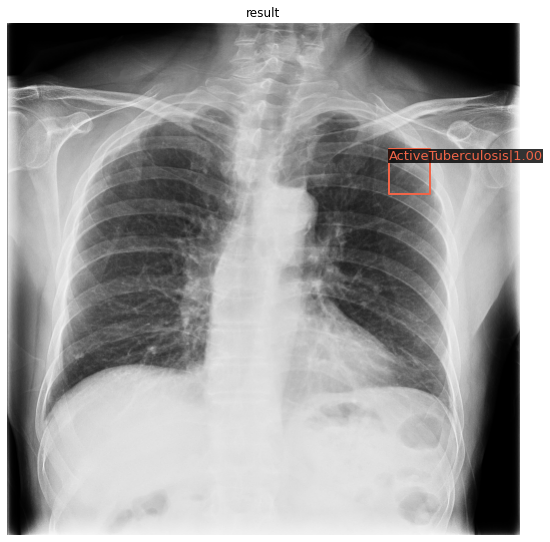

In [ ]:
# model = build_detector(cfg.model)

# Use the detector to do inference
img = 'data/TBX11K/imgs/tb/tb0005.png'
result = inference_detector(model, img)
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

#Classification